Accuracy: 0.7011818181818181
[[6923 3032]
 [ 255  790]]
              precision    recall  f1-score   support

           0       0.96      0.70      0.81      9955
           1       0.21      0.76      0.32      1045

    accuracy                           0.70     11000
   macro avg       0.59      0.73      0.57     11000
weighted avg       0.89      0.70      0.76     11000



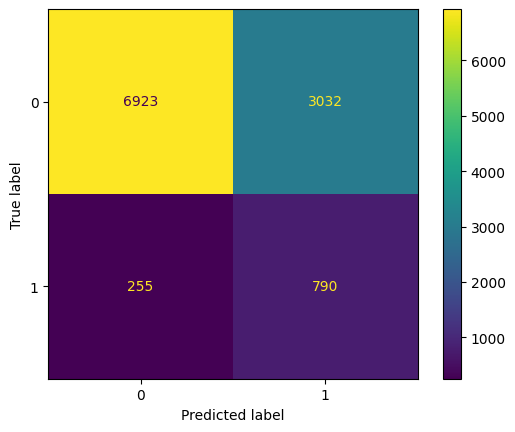

In [5]:
import pandas as pd

data = pd.read_excel('PhishDataset/data_imbal - 55000.xlsx')

data['length'] = data['URLs'].str.len()
data['#slash'] = data['URLs'].str.count('/')
data['https'] = data['URLs'].str.split(':', n=1).str[0].eq('https').astype(int)
data['http'] = data['URLs'].str.split(':', n=1).str[0].eq('http').astype(int)
data['#dot'] = data['URLs'].str.count(r'\.')
data['#dash'] = data['URLs'].str.count('-')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics

X = data[['length', '#slash', 'https', 'http', '#dot', '#dash']]
y = data['Labels']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_proba = model.predict_proba(X_test)[:, 1]

threshold = 0.05
y_pred = (y_proba >= threshold).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])


cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()